# Linear Regression Modelling & Evalutation

In this notebook, we will use the data set with 10 years of quotes and dates converted to the matplotlib format (explained later). We will train and test a linear regression model using the daily 'Open' prices, which are recorded when the trading session opens. Then, we will evaluate the results using various error evaluation metrics.

***
## Create a Linear Regression Model
We will split the data set into training and testing sets. Using the training set, we will fit the data to a linear regression model and plot the trained model.Then, we will create and plot a predictive linear model utilizing the testing data.

### Import Libraries

In [1]:
# for calculations and plotting data
import pandas as pd  
import datetime as dt 
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
%matplotlib inline

# for linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# import data set
amzn_data = pd.read_csv("AMZN-10Yr-Quotes-Processed.csv", parse_dates=['Date'])

In [3]:
# confirm data types
amzn_data.dtypes

Date     datetime64[ns]
Close           float64
Open            float64
High            float64
Low             float64
dtype: object

### Split Data Set
We will split the data into 80% for training and 20% for testing (70:30 ratio is also common).

#### X is the independent variable: dates (time)
X will need to be converted to a numerical value from datetime, since linear regression can only be performed with numerical data. We will utilize date2num() to convert dates to a number of days, since 01-01-01 AD, plus 1. This helper function is included with matplotlib, and it converts dates into the numerical representation used by matplotlib.
#### Y is the dependent variable: open prices (daily prices at open of trading day)

In [4]:
# declare the independent and dependent variables
X = mdates.date2num(amzn_data[['Date']])
Y = amzn_data[['Open']]

# split training and testing data for each variable with 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### Train a Model

In [5]:
# create a linear regression model object
train_model = LinearRegression()

# fit training data to model
train_model = train_model.fit(X_train, y_train)

In [6]:
# extract intercept and slope of linear regression line
intercept = train_model.intercept_
slope = train_model.coef_

print("Intercept: ", intercept)
print("Coefficient/Slope: ", slope)

Intercept:  [-416355.48944088]
Coefficient/Slope:  [[0.56693074]]


The intercept may appear to incorrect, but we must clarify that matplotlib assumes the date 01-01-01 is the start of time. Therefore, the intercept is stretching back to a time before the stock existed, which yields the large negative value. 

_Note:_ Matplotlib always adds 1 to the number of days since the first date. So, 01-01-01 is represented with 1, not 0. However, we can still input 0 (or assume the model has input 0) to determine the intercept value.

### Plot trained model and regression line

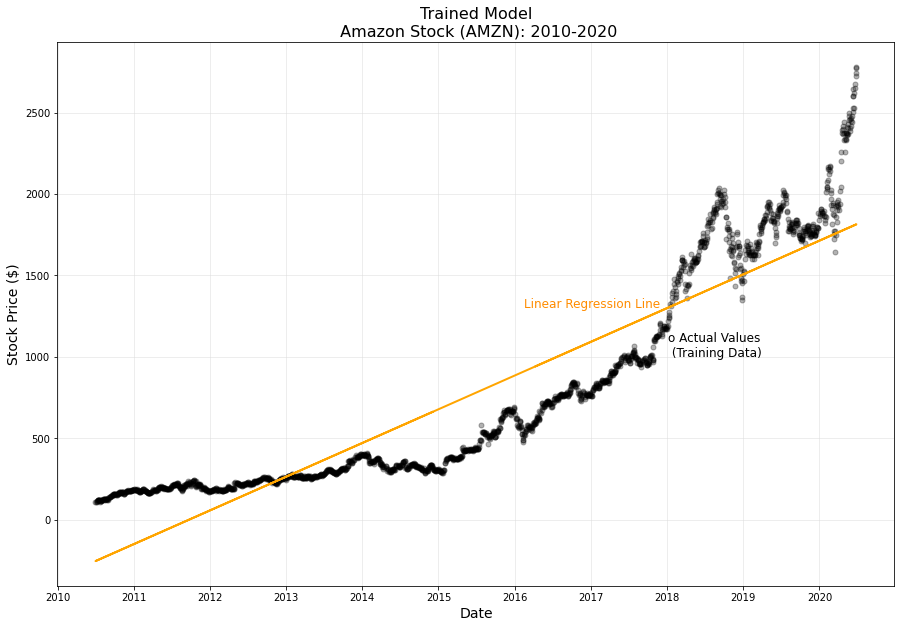

In [7]:
# format plot
plt.figure(figsize=(15,10))
plt.grid(color="gainsboro", linewidth=0.5)
plt.title("Trained Model\n Amazon Stock (AMZN): 2010-2020", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price ($)", fontsize=14)

# plot training data
plt.plot_date(X_train, y_train,  color='black', alpha=0.3, marker='o', markersize=5)
X_train_pred = train_model.predict(X_train) 
# use plot_date to display recognizable years (instead of number of days since 01-01-01)
plt.plot(X_train, X_train_pred, color='orange', linewidth=2)
plt.text(s="Linear Regression Line", x=736010, y=1300, color='darkorange', fontsize=12)
plt.text(s="o Actual Values \n (Training Data)", x=736700, y=1000, color='black', fontsize=12)
plt.show()

### Predictive Model using test data

In [8]:
# testing a single prediction
last_quote = dt.datetime.strptime('2020-06-26', '%Y-%m-%d')
# convert date to matplotlib representation
last_date = mdates.date2num(last_quote)
print(last_date)

737602.0


In [9]:
# output single prediction from date
prediction = train_model.predict([[last_date]])
predicted_value = prediction
print(predicted_value)

[[1813.75958713]]


In [10]:
# print actual value on that date
amzn_data.loc[((mdates.date2num(amzn_data['Date'])) == last_date)]

,Date,Close,Open,High,Low
0,2020-06-26,2692.87,2775.056,2782.5688,2688.0


The predicted value and the actual value are quite different, however, this difference matches what we can see in the plot with training data above.

## Create predictive model with test set

In [11]:
# compute predicted values and store in array
y_predicted = train_model.predict(X_test)

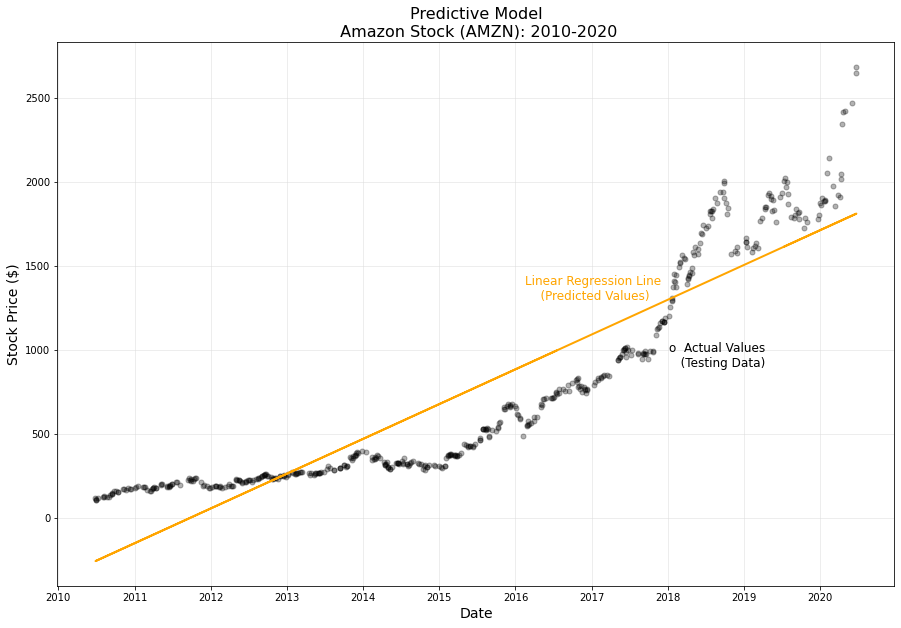

In [12]:
# format plot
plt.figure(figsize=(15,10))
plt.grid(color="gainsboro", linewidth=0.5)
plt.title("Predictive Model\n Amazon Stock (AMZN): 2010-2020", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Stock Price ($)", fontsize=14)

# plot predicted values with test data
plt.plot_date(X_test, y_test, color='black', alpha=0.3, markersize=5)
# plot linear regression line for predicted values
plt.plot(X_test, y_predicted, color='orange', linewidth=2)

plt.text(s="Linear Regression Line \n    (Predicted Values)", x=736010, y=1300, color='orange', fontsize=12)
plt.text(s="o  Actual Values\n   (Testing Data)", x=736700, y=900, color='black', fontsize=12)
plt.show()

# Evaluate Model
We will utilize the following methods to evaluate our regression model:
- Residuals Distribution
- Confidence interval
- Null hypothesis and p-value
- MAE, MSE and RMSE

### Import libraries

In [13]:
# import norm package to plot normal distribution
from scipy.stats import norm
import seaborn as sns

# import for confidence interval and p-value
import statsmodels.api as sm

# import for error & accuracy evaluation metrics
from sklearn import metrics
import numpy as np

### Actual vs. Predicted Prices

Text(0.5, 1.0, 'Actual vs Predicted Prices')

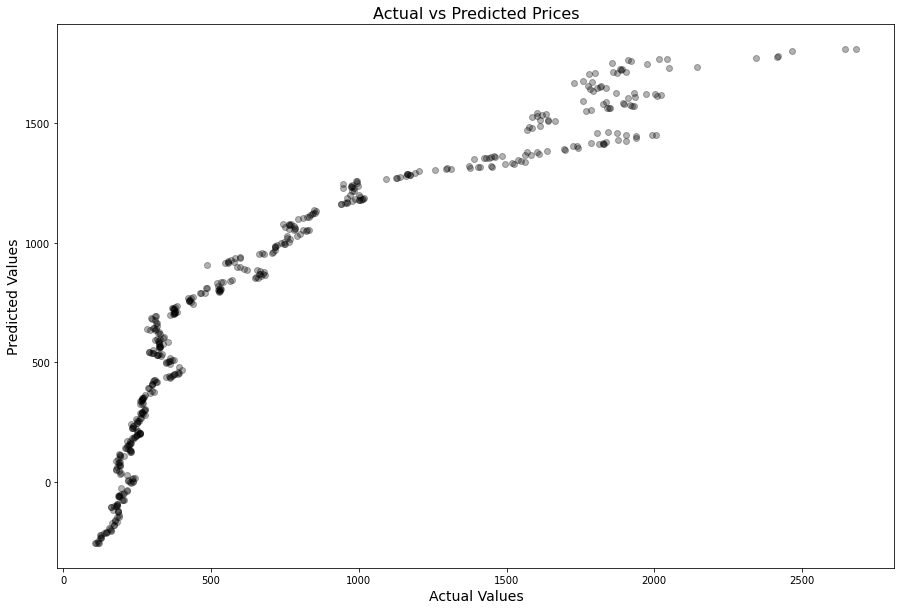

In [14]:
# actual values and predicted values
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_predicted, color='black', alpha=0.3)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Actual vs Predicted Prices", fontsize=16)

From this plot, we can see that the predicted values are similar to the actual values because the graph shows a somewhat linear pattern. 

However, since it is not perfectly linear, we can also conclude that it predicted too high of values for the first half of the set and too low of values for the second half of the test set. This aligns with the visualization of the model and regression line above.

### Residuals Distribution
Plot residuals, predicted values' deviation from actual values. They should be close to a normal distribution. 

In [15]:
# format seaborn plots
sns.set(color_codes=True)

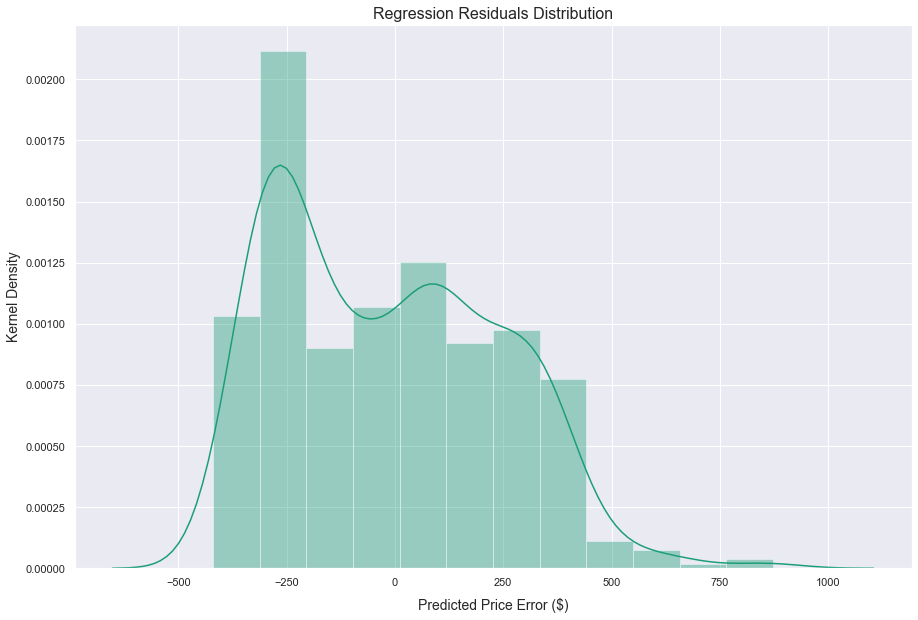

In [16]:
sns.set_palette('Dark2')
plt.figure(figsize=(15,10))
plt.xlabel("Predicted Price Error ($)", labelpad=10, fontsize=14)
plt.ylabel("Kernel Density", fontsize=14)
plt.title("Regression Residuals Distribution", fontsize=16)

# plot histogram (actual - predicted = residual)
sns.distplot((y_test - y_predicted))

The histogram shows an interesting distribution. It is not quite a normal bell curve due to the large spike of residual errors on the left, which indicates that the model often predicted a value to be higher than its actual value.

### Confidence Interval
The confidence interval will provide us with a range for the value of the slope (or coefficient) of the regression line such that we can have 95% confidence that this range (or interval) includes the correct coefficient value.

In [17]:
# create a least squares regression model 
a = sm.add_constant(X) # must add constant (1) for statsmodels
b = Y

# fit data to model
model = sm.OLS(b, a).fit()

# display regression statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Open   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Wed, 01 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:43:00   Log-Likelihood:                -17583.
No. Observations:                2518   AIC:                         3.517e+04
Df Residuals:                    2516   BIC:                         3.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.158e+05   3627.125   -114.648      0.000   -4.23e+05   -4.09e+05
x1             0.5662      0.005    114.862      0.000       0.557       0.576
==============================================================================
Omnibus:                      128.355   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.950
Skew:                           0.436   Prob(JB):                     2.20e-24
Kurtosis:                       2.474   Cond. No.                     5.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# with 95% confidence (certainty), 
# we can say the coefficient is between the resulting values
model.conf_int()

,0,1
const,-422954.485550,-408729.575352
x1,0.556562,0.575895


We can say that the coefficient of the regression model is between 0.5566 and 0.5759 with 95% confidence. Before, our trained model showed a coefficient of 0.5669, which is within this range.

### Null Hypothesis & P-Value

The p-value is a useful measure to be able to reject the null hypothesis. Initially, we will assume the null hypothesis is true, meaning that there is absolutely no relationship between the independent variable (date) and dependent variable (stock price). 

If there is no relationship, the coefficient (slope) must be 0. So, we are assuming that the coefficient of the regression line is 0. The p-value indicates the probability of the coefficient being 0.

In [19]:
# display p-value
model.pvalues

const    0.0
x1       0.0
dtype: float64

Since the p-value is 0 (or very close to 0), we can reject the null hypothesis. A p-value near zero shows that there is zero probability of a lack of relationship between the variables. Therefore, we confirm that a relationship between time and stock price does indeed exist.

### Error Evaluation Metrics
- MAE (Mean Absolute Error): average error 
- MSE (Mean Squared Error): average of squared errors
- RMSE (Root Mean Squared Error): square root of MSE

In [20]:
# Calculate and print values of MAE, MSE, RMSE
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))  
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 219.70058096491312
MSE: 64291.14101038097
RMSE: 253.55697783808074


The RMSE is often considered the best of these three primary metrics. As you can see, the MAE is smaller than the RMSE. This is because of the squaring of errors in MSE, which leads to a much larger emphasis on larger errors. 

Thus, the RMSE is larger than MAE. This shows that there was an average error of $253 between the actual and predicted values. 

In [21]:
# compute average opening prices
amzn_data['Open'].mean()

775.4067598888006

With an average price of $775, an error of \\$253 is in an error of almost 33%! We will see this error reduced in the next notebook, where we observe the recent five years of data.

### $R^2$ (R-Squared)
This is another statistical measure to evaluate the accuracy of the regression model. It results in a value between 0 and 1, where a higher value means that the model fits your data well. The R-squared value is the percentage of the variance in the dependent variable that can be explained by the model.

In [22]:
print('R-Squared:', metrics.r2_score(y_test, y_predicted))

R-Squared: 0.8347846127274651


The r-squared value indicates that approximately 83.5% of the variation in the predicted stock prices can be explained by our model. In simple terms, this means that 83.5% of the test data fit the regression model. The predicted values are highly correlated with the actual values.

This is a relatively high r-squared value for stock data, but the next notebook will show an even higher value. 

***
# Conclusion

Overall, the linear regression model fit with time and stock price data displays substantial evidence of predicting future prices. However, there are still some aspects that can be further improved to yield more accurate predictions. Particularly, we will show a different method of achieving a positive intercept value. 

A model with the recent five years of data, instead of ten years, produces a more accurate model. In the plots in this notebook, we see that the stock price is relatively flat from 2010 to 2015, and after that, it begins to increase at a faster rate. In the jupyter notebook with 5 year data, we will be able to train a more accurate model with this section of the data.